In [1]:
#ESTANDARIZACION DEL DATASET Y DIVISION ENTRE COLUMNAS Y LA CLASE

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Separa características y target
X = dataset.drop("target", axis=1)
y = dataset["target"]

In [6]:
# Estandariza las características
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [10]:
# Convertir el array en un DataFrame
array_df = pd.DataFrame(y, columns=['target'])

# Calcular la matriz de correlación
correlation_matrix = X.corrwith(array_df['target'])

In [ ]:
# GENERA LA MATRIZ DE CORRELACION

In [11]:
correlation_matrix


age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

In [ ]:
# LA MEJOR ES cp          0.433798    Y thalach     0.421741

In [ ]:
# MODELADO DE KNN Y GRAFICA QUE VERIFICA EL MEJOR K

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape[1]

# Paso 3: Entrenamiento del modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=11)  # Puedes ajustar el valor de 'n_neighbors'
knn_model.fit(X_train, y_train)

# Paso 4: Evaluación del modelo
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo KNN:", accuracy)

Precisión del modelo KNN: 0.7377049180327869


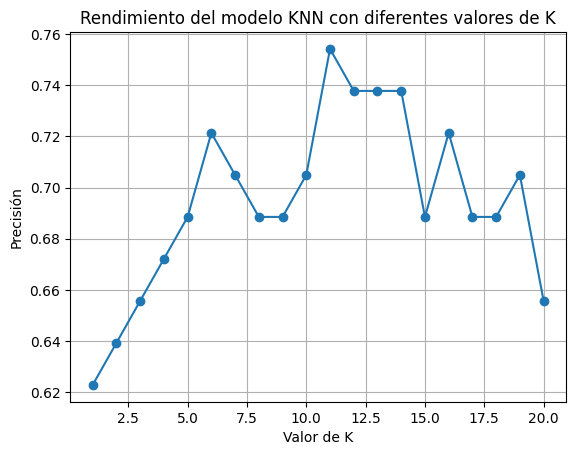

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Supongamos que ya tienes tus datos X (características) e y (etiquetas) preparados

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de valores de K que deseas probar
k_values = list(range(1, 21))  # Por ejemplo, desde K=1 hasta K=20

# Lista para almacenar las métricas de rendimiento para cada valor de K
accuracy_values = []

# Entrenar el modelo KNN con diferentes valores de K y guardar las métricas de rendimiento
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Crear el gráfico de línea para mostrar cómo el rendimiento cambia con diferentes valores de K
plt.plot(k_values, accuracy_values, marker='o')
plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.title('Rendimiento del modelo KNN con diferentes valores de K')
plt.grid(True)
plt.show()


In [ ]:
# ES EL K = 11 EL MEJOR